In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random
import os

In [2]:
from tensorflow.config.experimental import list_physical_devices
print(list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
!kaggle datasets download -d alessiocorrado99/animals10

Dataset URL: https://www.kaggle.com/datasets/alessiocorrado99/animals10
License(s): GPL-2.0
100% 585M/586M [00:23<00:00, 28.9MB/s]
100% 586M/586M [00:23<00:00, 26.6MB/s]


In [4]:
!unzip animals10.zip

Streaming output truncated to the last 5000 lines.
  inflating: raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: raw-img/ragno/OIP-MgrKq05YHGXsgj1AmYIyJQHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MhRGx7d8nbnHBuqrsO00EQHaFo.jpeg  
  inflating: raw-img/ragno/OIP-MiVgMXcKGQdog2KGe7i0YQHaHh.jpeg  
  inflating: raw-img/ragno/OIP-Mis0lJf3

## Getting Data

In [5]:
for dirpath, dirnames, filenames in os.walk('raw-img'):
    print(f"Found {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

Found 10 directories and 0 images in raw-img
Found 0 directories and 1866 images in raw-img/mucca
Found 0 directories and 1862 images in raw-img/scoiattolo
Found 0 directories and 3098 images in raw-img/gallina
Found 0 directories and 2112 images in raw-img/farfalla
Found 0 directories and 4863 images in raw-img/cane
Found 0 directories and 1668 images in raw-img/gatto
Found 0 directories and 1820 images in raw-img/pecora
Found 0 directories and 1446 images in raw-img/elefante
Found 0 directories and 2623 images in raw-img/cavallo
Found 0 directories and 4821 images in raw-img/ragno


In [6]:
animals = sorted([animal for animal in os.listdir('raw-img')])
animals

['cane',
 'cavallo',
 'elefante',
 'farfalla',
 'gallina',
 'gatto',
 'mucca',
 'pecora',
 'ragno',
 'scoiattolo']

In [7]:
translate = {'cane': 'dog',
 'cavallo': 'horse',
 'elefante': 'elephant',
 'farfalla': 'butterfly',
 'gallina': 'chicken',
 'gatto': 'cat',
 'mucca': 'cow',
 'pecora': 'sheep',
 'scoiattolo': 'squirrel',
 'ragno': 'spider',
 'dog': 'cane',
 'elephant': 'elefante',
 'butterfly': 'farfalla',
 'chicken': 'gallina',
 'cat': 'gatto',
 'cow': 'mucca',
 'sheep': 'pecora',
 'spider': 'ragno',
 'squirrel': 'scoiattolo',
 'horse': 'cavallo'}

## View Images

In [14]:
def view_random_images():
    plt.figure(figsize=(10, 10))
    for i in range(0, 9):
        ax = plt.subplot(3, 3, i+1)
        random_number = random.randint(0, 9)
        image_path = os.path.join('raw-img', animals[random_number])
        image_path = os.path.join(image_path, random.sample(os.listdir(image_path), 1)[0])
        image = plt.imread(image_path)
        plt.imshow(image)
        plt.title(translate[animals[random_number]] + str(image.shape))
        plt.axis('off')

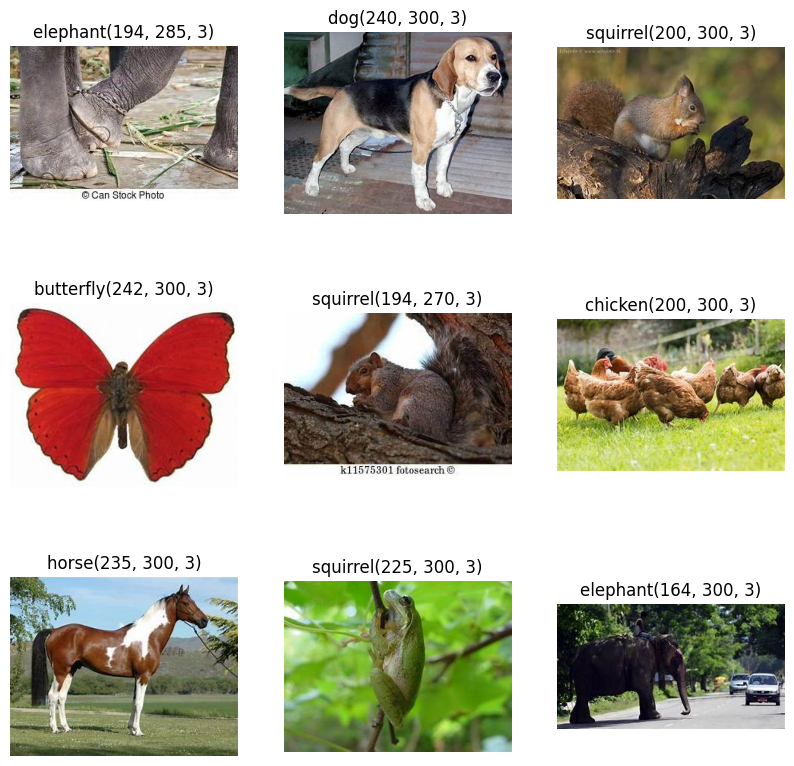

In [15]:
view_random_images()

## Load data

In [16]:
from tensorflow.keras.utils import image_dataset_from_directory

In [17]:
data = image_dataset_from_directory(directory='raw-img',
                                    labels='inferred',
                                    label_mode='categorical',
                                    class_names=animals,
                                    batch_size=32,
                                    image_size=(256,256),
                                    seed = 42)

Found 26179 files belonging to 10 classes.


In [18]:
data_iterator = data.as_numpy_iterator()
data_batch = data_iterator.next()

In [19]:
data_batch[0].shape # 32 Images

(32, 256, 256, 3)

In [20]:
data_batch[1].shape # 32 labels

(32, 10)

In [21]:
len(data) # 126179/32

819

## Preprocessing Data

### 1. Scaling

- Our 'data' is a pipeline we can scale everytime we access a batch.
- So, let's scale it while we re fetching the data itself, using a method called `map` that applies the required transformation while prefetching.


In [22]:
data = data.map(lambda x, y: (x/255., y))

In [23]:
data_iterator = data.as_numpy_iterator()
data_batch = data_iterator.next()

In [24]:
data_batch[0].min(), data_batch[0].max(), data_batch[0].shape, data_batch[1].shape

(0.0, 1.0, (32, 256, 256, 3), (32, 10))

In [25]:
data_batch[0][0]

array([[[0.6680147 , 0.57389706, 0.44056374],
        [0.6863971 , 0.59227943, 0.45894608],
        [0.69635415, 0.6022365 , 0.46890318],
        ...,
        [0.77254903, 0.7411765 , 0.6666667 ],
        [0.77254903, 0.7411765 , 0.6666667 ],
        [0.77254903, 0.7411765 , 0.6666667 ]],

       [[0.676563  , 0.5824454 , 0.44911206],
        [0.683986  , 0.58986837, 0.456535  ],
        [0.6870021 , 0.5928845 , 0.45955116],
        ...,
        [0.74315345, 0.7117809 , 0.6372711 ],
        [0.7537476 , 0.72237504, 0.6478652 ],
        [0.7655107 , 0.7341381 , 0.6596283 ]],

       [[0.68820584, 0.5940882 , 0.46075487],
        [0.6807021 , 0.58658445, 0.45325115],
        [0.6742647 , 0.5801471 , 0.44681373],
        ...,
        [0.724136  , 0.69276345, 0.61825365],
        [0.7366566 , 0.705284  , 0.6307742 ],
        [0.74842954, 0.717057  , 0.6425472 ]],

       ...,

       [[0.98543227, 0.9845199 , 0.9762187 ],
        [0.98373836, 0.9846431 , 0.9819677 ],
        [0.98396903, 0

(-0.5, 255.5, 255.5, -0.5)

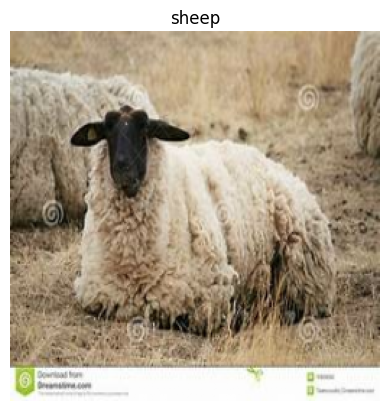

In [26]:
img = data_batch[0][0]
plt.imshow(img)
plt.title(translate[animals[data_batch[1][0].argmax()]])
plt.axis('off')

### 2. Splitting

In [27]:
total = len(data)
train_size = int(total * 0.7) + 1
val_size = int(total * 0.2) + 1
test_size = int(total * 0.1)
print(train_size, val_size, test_size, total == train_size + val_size + test_size)

574 164 81 True


In [28]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size)
len(train), len(val), len(test)

(574, 164, 81)

## Building a baseline model

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, AvgPool2D

In [36]:
model_1 = Sequential([
    Conv2D(
        filters=10,
        kernel_size=3,
        activation='relu',
        input_shape = (256, 256, 3)
    ),
    MaxPool2D(2, padding='valid'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2, padding='valid'),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2, padding='valid'),
    Flatten(),
    Dense(10, activation='relu'),
    Dense(10, activation='softmax')
])

model_1.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

history_1 = model_1.fit(
    train,
    epochs = 10,
    steps_per_epoch = len(train),
    validation_data = val,
    validation_steps = len(val)
)

Epoch 1/10
574/574 [==============================] - 77s 125ms/step - loss: 2.0811 - accuracy: 0.2429 - val_loss: 1.9377 - val_accuracy: 0.2660
Epoch 2/10
574/574 [==============================] - 61s 106ms/step - loss: 1.8340 - accuracy: 0.3268 - val_loss: 1.7598 - val_accuracy: 0.3611
Epoch 3/10
574/574 [==============================] - 72s 125ms/step - loss: 1.7051 - accuracy: 0.3731 - val_loss: 1.7149 - val_accuracy: 0.3712
Epoch 4/10
574/574 [==============================] - 61s 105ms/step - loss: 1.6037 - accuracy: 0.4125 - val_loss: 1.6421 - val_accuracy: 0.4099
Epoch 5/10
574/574 [==============================] - 60s 104ms/step - loss: 1.5091 - accuracy: 0.4495 - val_loss: 1.6866 - val_accuracy: 0.3870
Epoch 6/10
574/574 [==============================] - 73s 126ms/step - loss: 1.4344 - accuracy: 0.4878 - val_loss: 1.6906 - val_accuracy: 0.4152
Epoch 7/10
574/574 [==============================] - 60s 104ms/step - loss: 1.3515 - accuracy: 0.5164 - val_loss: 1.5959 - val_ac

## Evaluating the model

In [37]:
model_1.evaluate(test)

81/81 [==============================] - 33s 43ms/step - loss: 1.6868 - accuracy: 0.4573


[1.6868047714233398, 0.4572766423225403]

In [62]:
def plot_loss_curves(history):
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    df = pd.DataFrame(history.history)
    ax[0].plot(df[['loss', 'val_loss']])
    ax[0].set_title('Loss')
    ax[0].legend(['train', 'val'])
    ax[1].plot(df[['accuracy', 'val_accuracy']])
    ax[1].set_title('Accuracy')
    ax[1].legend(['train', 'val'])

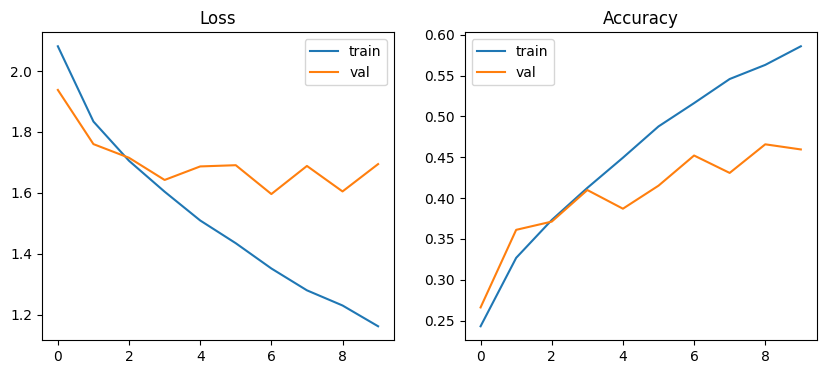

In [63]:
plot_loss_curves(history_1)